In [1]:
import tensorflow as tf 
# from tensorflow.exaples.tutorials.mnist import input_data

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

ModuleNotFoundError: No module named 'tensorflow.examples'

In [63]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

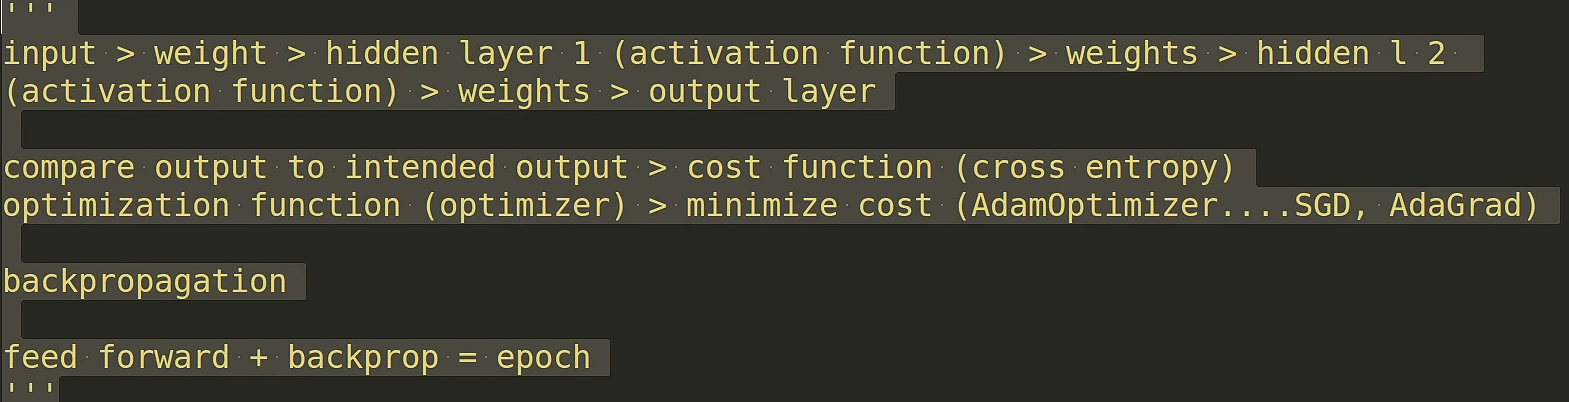

In [7]:
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


mnist = tf.keras.datasets.mnist.load_data()


In [8]:
# Hidden Layers
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500


In [9]:
# classes
n_classes = 10

In [10]:
# 
batch_size = 100

TensorFlow placeholder with a float data type and a shape of [None, 784].

In [11]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# height * width
x = tf.compat.v1.placeholder('float',[None,784])
y = tf.compat.v1.placeholder('float')



Instructions for updating:
non-resource variables are not supported in the long term



In this specific case, tf.random([784, n_nodes_hl1]) would attempt to generate a random tensor with:

784 elements in the first dimension

n_nodes_hl1 elements in the second dimension

In [12]:
def neural_network_model(data):
    hidden_1_layer = {'weights':tf.compat.v1.Variable(tf.compat.v1.random([784, n_nodes_hl1])),
                      'biases':tf.compat.v1.Variable(tf.compat.v1.random([n_nodes_hl1]))
                      }
    hidden_2_layer = {'weights':tf.compat.v1.Variable(tf.compat.v1.random([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.compat.v1.Variable(tf.compat.v1.random([n_nodes_hl2]))
                      }
    hidden_3_layer = {'weights':tf.compat.v1.Variable(tf.compat.v1.random([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.compat.v1.Variable(tf.compat.v1.random([n_nodes_hl3]))
                      }
    output_layer = {'weights':tf.compat.v1.Variable(tf.compat.v1.random([n_nodes_hl3, n_classes])),
                      'biases':tf.compat.v1.Variable(tf.compat.v1.random([n_classes]))
                      }
    # (input_data * weight) + biases
    
    l1 = tf.compat.v1.add(tf.matmul(data,hidden_1_layer['weights']) , hidden_1_layer['biases'])
    l1 = tf.compat.v1.nn.relu(l1) # l1 Activation
    
    l2 = tf.compat.v1.add(tf.matmul(l1,hidden_2_layer['weights']) , hidden_2_layer['biases'])
    l2 = tf.compat.v1.nn.relu(l2) # l2 Activation
    
    l3 = tf.compat.v1.add(tf.matmul(l2,hidden_3_layer['weights']) , hidden_3_layer['biases'])
    l3 = tf.compat.v1.nn.relu(l3) # l3 Activation
    
    output = tf.add(tf.matmul(l2,output_layer['weights']) , output_layer['biases'])
    
    return output
    

In [13]:
def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.compat.v1.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
    optimizer = tf.compat.v1.train.AdamOptimizer().minimize(cost)
    optimizer = tf.compat.v1.train.AdamOptimizer().minimize(cost)
    
    hm_epochs = 10 # no of cycles of forward + backward
    
    with tf.compat.v1.Session as sess:
        sess.run(tf.compat.v1.global_variables_initializer())
        
        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x,epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer,cost],feed_dict = {x:epoch_x, y:epoch_y})
                epoch_loss += c
            print('Epoch',epoch,'completed out of',hm_epochs,'loss',epoch_loss)
            
        correct = tf.compat.v1.equal(tf.compat.v1.argmax(prediction,1), tf.argmax(y,1))
        accuracy = tf.compat.v1.reduce_mean(tf.compat.v1.cast(correct,'float'))        
        print("Accuracy",accuracy.eval({x:test_images,y:test_labels}))
    

In [14]:
train_neural_network(x)

TypeError: 'TFModuleWrapper' object is not callable